In [2]:
!pip install pandas_profiling

    100% |████████████████████████████████| 245kB 1.7MB/s ta 0:00:01
    100% |████████████████████████████████| 3.1MB 1.8MB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 4.1MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 2.6MB/s ta 0:00:01
    100% |████████████████████████████████| 604kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 3.9MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 4.2MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 4.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 5.3MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 6.5MB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 4.4MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 1.8MB/s ta 0:00:011
    100% |████████████████████████████████| 245kB 3.8MB/s ta 0:00:01


  Running setup.py bdist_wheel for htmlmin ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Running setup.py bdist_wheel for phik ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
Successfully built htmlmin phik
  Found existing installation: networkx 2.2
    Uninstalling networkx-2.2:
      Successfully uninstalled networkx-2.2
  Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0
  Found existing installation: widgetsnbextension 3.2.1
    Uninstalling widgetsnbextension-3.2.1:
      Successfully uninstalled widgetsnbextension-3.2.1
  Found existing installation: ipywidgets 7.2.1
    Uninstalling ipywidgets-7.2.1:
      Successfully uninstalled ipywidgets-7.2.1
  Found existing installation: Jinja2 2.10
    Uninstalling Jinja2-2.10:
      Successfully uninstalled Jinja2-2.10

In [1]:
import pandas as pd
import numpy as np
import re 
#import geopandas as gpd
import pandas as pd
import json
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="white")
import warnings
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport
import random
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [2]:
budgets_fbi = pd.read_csv('CleanData/Merged_FBI_Budgets_Normalized.csv')
budgets_fbi.head()

,city_merge_name,population,city_population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt
0,"Anchorage, AK",260900,259348,2000,0.005841,0.043473,5523.35,352.61,2426.51,2386.40,0.0,2386.40,195.60,0.0,0.0,0.0,0.0,0.0,213.45,0.0
1,"Anchorage, AK",263588,260816,2001,0.006632,0.043500,4831.29,594.42,2281.82,2251.80,0.0,2251.80,138.03,0.0,0.0,0.0,0.0,0.0,266.67,0.0
2,"Anchorage, AK",267280,264274,2002,0.006439,0.044706,4914.64,708.42,2455.38,2426.06,0.0,2426.06,165.42,0.0,0.0,0.0,0.0,0.0,285.35,0.0
3,"Anchorage, AK",282940,268229,2003,0.006789,0.045483,4463.29,320.32,2590.59,2561.61,0.0,2561.61,176.95,0.0,0.0,0.0,0.0,0.0,121.36,0.0
4,"Anchorage, AK",286671,270568,2004,0.008062,0.038187,5007.39,325.37,2627.83,2599.76,0.0,2599.76,143.11,0.0,0.0,0.0,0.0,0.0,136.75,0.0


### Load the Income Data

In [3]:
income_data= pd.read_csv('CleanData/DPI_Clean.csv')
povertydf = pd.read_csv('CleanData/Demographics.csv')
racedf = pd.read_csv('CleanData/Race.csv')
racedf = racedf[racedf['geographic_area_name'].notnull()]


income_data.loc[income_data.loc[income_data['city'].str.contains('Fort Smith, AR')].index.values,'city'] = 'Ft. Smith, AR'
income_data.loc[income_data.loc[income_data['city'].str.contains('Boise City, ID')].index.values,'city'] = 'Boise, ID'
income_data.loc[income_data.loc[income_data['city'].str.contains('Louisville/Jefferson County, KY')].index.values,'city'] = 'Louisville, KY'

povertydf.loc[povertydf.loc[povertydf['city_name'].str.contains('Fort Smith, AR')].index.values,'city_name'] = 'Ft. Smith, AR'
povertydf.loc[povertydf.loc[povertydf['city_name'].str.contains('Boise City, ID')].index.values,'city_name'] = 'Boise, ID'
povertydf.loc[povertydf.loc[povertydf['city_name'].str.contains('Louisville/Jefferson County, KY')].index.values,'city_name'] = 'Louisville, KY'

racedf.loc[racedf.loc[racedf['geographic_area_name'].str.contains('Fort Smith, AR')].index.values,'geographic_area_name'] = 'Ft. Smith, AR'
racedf.loc[racedf.loc[racedf['geographic_area_name'].str.contains('Boise City, ID')].index.values,'geographic_area_name'] = 'Boise, ID'
racedf.loc[racedf.loc[racedf['geographic_area_name'].str.contains('Louisville/Jefferson County, KY')].index.values,'geographic_area_name'] = 'Louisville, KY'

In [4]:
merged_df = budgets_fbi.merge(income_data,left_on=['city_merge_name','year'],right_on = ['city','Year'],how='inner')
merged_df.city.unique().shape

(119,)

### Lost Cities

In [5]:
for i in budgets_fbi.city_merge_name.unique():
    if i not in merged_df.city.unique():
        print(i)

Oakland, CA
Wilmington, DE
Ft. Lauderdale, FL
St. Petersburg, FL
Ft. Wayne, IN
Gary, IN
Kansas City, KS
St. Paul, MN
Ft. Worth, TX
Norfolk, VA
Tacoma, WA


In [6]:
merged_df2 = merged_df.merge(povertydf,left_on=['city_merge_name','year'],right_on = ['city_name','Year'],how='inner')
merged_df2.city.unique().shape

(118,)

In [7]:
for i in merged_df.city_merge_name.unique():
    if i not in merged_df2.city.unique():
        print(i)

Boise, ID


In [8]:
merged_df3 = merged_df2.merge(racedf,left_on=['city_merge_name','year'],right_on = ['geographic_area_name','Year'],how='inner')
merged_df3 = merged_df3.T.drop_duplicates().T


merged_df3['percent_race_one_race_asian'] =merged_df3['percent_race_one_race_asian'].str.replace('N','0.0')
merged_df3['percent_race_one_race_black_or_african_american'] = merged_df3['percent_race_one_race_black_or_african_american'].str.replace('N','0.0')
merged_df3['percent_race_one_race_native_hawaiian_and_other_pacific_islander'] = merged_df3['percent_race_one_race_native_hawaiian_and_other_pacific_islander'].str.replace('N','0.0')
merged_df3['percent_race_one_race_white'] = merged_df3['percent_race_one_race_white'].str.replace('N','0.0')
merged_df3= merged_df3.drop(columns=['city_population'])
merged_df3.head()

,city_merge_name,population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,...,total_estimate_mean_income_deficit_for_unrelated_individuals_(dollars),total_estimate_age_under_18_years,total_estimate_sex_male,total_estimate_age_65_years_and_over,percent_below_poverty_level_estimate_age_18_to_64_years,percent_race_one_race_asian,percent_race_one_race_black_or_african_american,percent_race_one_race_native_hawaiian_and_other_pacific_islander,percent_race_one_race_white,percent_hispanic_or_latino
0,"Anchorage, AK",313181,2010,0.008129,0.035063,6036.69,433.95,2880.31,2846.29,0,...,6609,100776,188590,26787,8.6,6.5,4.9,1.7,71.1,6.7
1,"Anchorage, AK",310965,2011,0.007892,0.03302,5815.54,410.66,2787.14,2755.34,0,...,6002,99826,188626,30084,7.5,6.5,4.3,1.6,70.8,6.9
2,"Anchorage, AK",313529,2012,0.008111,0.036182,5378.15,446.75,2429.79,2398.01,0,...,7493,99897,194906,31203,7.9,7.4,5.0,1.6,70.3,7.2
3,"Anchorage, AK",314553,2013,0.007938,0.041478,5694.68,454.03,2471.81,2439.77,0,...,6788,100002,196614,33232,7.2,6.5,4.8,1.7,69.8,7.6
4,"Anchorage, AK",316696,2014,0.008437,0.039514,5735.87,468.5,2456.47,2430.38,0,...,6674,99732,197075,35819,8.5,7.4,4.5,1.7,69.3,7.9


In [9]:
norm_column = "population_persons"


cols_to_normalize = ["personal_income_thousands_of_dollars",
"total_estimate_educational_attainment_population_25_years_and_over",
"total_estimate_age_18_to_64_years",
"total_estimate_employment_status_civilian_labor_force_16_years_and_over",
"total_estimate_population_for_whom_poverty_status_is_determined",
"total_estimate_age_65_years_and_over",
"total_estimate_sex_female",
"total_estimate_work_experience_population_16_years_and_over",
"total_estimate_age_under_18_years",
"total_estimate_sex_male",
"total_estimate_age_65_years_and_over"]


for i in cols_to_normalize:
    merged_df3[i] = merged_df3[i]/merged_df3["population_persons"]

In [11]:
merged_df3

,city_merge_name,population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,...,total_estimate_mean_income_deficit_for_unrelated_individuals_(dollars),total_estimate_age_under_18_years,total_estimate_sex_male,total_estimate_age_65_years_and_over,percent_below_poverty_level_estimate_age_18_to_64_years,percent_race_one_race_asian,percent_race_one_race_black_or_african_american,percent_race_one_race_native_hawaiian_and_other_pacific_islander,percent_race_one_race_white,percent_hispanic_or_latino
0,"Anchorage, AK",313181,2010,0.008129,0.035063,6036.69,433.95,2880.31,2846.29,0,...,6609,0.263086,0.492334,1.8256e-07,8.6,6.5,4.9,1.7,71.1,6.7
1,"Anchorage, AK",310965,2011,0.007892,0.03302,5815.54,410.66,2787.14,2755.34,0,...,6002,0.257335,0.486247,1.99916e-07,7.5,6.5,4.3,1.6,70.8,6.9
2,"Anchorage, AK",313529,2012,0.008111,0.036182,5378.15,446.75,2429.79,2398.01,0,...,7493,0.254884,0.497295,2.0313e-07,7.9,7.4,5.0,1.6,70.3,7.2
3,"Anchorage, AK",314553,2013,0.007938,0.041478,5694.68,454.03,2471.81,2439.77,0,...,6788,0.25188,0.495222,2.10828e-07,7.2,6.5,4.8,1.7,69.8,7.6
4,"Anchorage, AK",316696,2014,0.008437,0.039514,5735.87,468.5,2456.47,2430.38,0,...,6674,0.250585,0.495168,2.26129e-07,8.5,7.4,4.5,1.7,69.3,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,"Cheyenne, WY",95635,2013,0.00207,0.027459,8445.96,339.58,2471.24,2401.25,0,...,5944,0.236075,0.492952,1.3997e-06,9.7,1.8,3.4,0.0,88.0,14.1
874,"Cheyenne, WY",96236,2014,0.0016,0.024326,8430.56,359.75,2541.09,2481.71,0,...,5887,0.229789,0.483527,1.4722e-06,11.8,1.0,3.3,0.0,84.9,14.3
875,"Cheyenne, WY",96943,2015,0.001774,0.025819,8849.32,470.45,2767.05,2703.34,0,...,5956,0.231115,0.487878,1.43465e-06,11,1.2,2.5,0.2,88.7,14.5
876,"Cheyenne, WY",97275,2016,0.002519,0.030213,8710.69,504.08,2665.2,2599.29,0,...,5882,0.226884,0.496746,1.49136e-06,9.8,1.2,2.7,0.4,90.6,14.6


In [11]:
dfoi = merged_df3[merged_df3.year==2017][merged_df3.columns[:9]].head(10)
dfoi 
profile = ProfileReport(dfoi)

In [51]:
def convert_to_numeric(df,col):
    try:
        df[col] = df[col].apply(float)
    except:
        print(col)
    
def convert_name_to_numeric(row):
    return name_dict[row]

def numeric_to_name(row):
    return label_dict[row]
    
    

### Create The Df for clustering

In [52]:
test= merged_df3.copy().dropna()
years= test.year
test = test.drop(columns='population')
test = test.drop(columns="population_persons")

for i in test.columns:
    convert_to_numeric(test,i)
test = test.drop(columns='year')
test

city_merge_name


,city_merge_name,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,...,total_estimate_mean_income_deficit_for_unrelated_individuals_(dollars),total_estimate_age_under_18_years,total_estimate_sex_male,total_estimate_age_65_years_and_over,percent_below_poverty_level_estimate_age_18_to_64_years,percent_race_one_race_asian,percent_race_one_race_black_or_african_american,percent_race_one_race_native_hawaiian_and_other_pacific_islander,percent_race_one_race_white,percent_hispanic_or_latino
0,"Anchorage, AK",0.008129,0.035063,6036.69,433.95,2880.31,2846.29,0.0,2846.29,103.90,...,6609.0,0.263086,0.492334,1.825603e-07,8.6,6.5,4.9,1.7,71.1,6.7
1,"Anchorage, AK",0.007892,0.033020,5815.54,410.66,2787.14,2755.34,0.0,2755.34,93.42,...,6002.0,0.257335,0.486247,1.999156e-07,7.5,6.5,4.3,1.6,70.8,6.9
2,"Anchorage, AK",0.008111,0.036182,5378.15,446.75,2429.79,2398.01,0.0,2398.01,96.70,...,7493.0,0.254884,0.497295,2.031304e-07,7.9,7.4,5.0,1.6,70.3,7.2
3,"Anchorage, AK",0.007938,0.041478,5694.68,454.03,2471.81,2439.77,0.0,2439.77,128.83,...,6788.0,0.251880,0.495222,2.108275e-07,7.2,6.5,4.8,1.7,69.8,7.6
4,"Anchorage, AK",0.008437,0.039514,5735.87,468.50,2456.47,2430.38,0.0,2430.38,81.63,...,6674.0,0.250585,0.495168,2.261289e-07,8.5,7.4,4.5,1.7,69.3,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,"Cheyenne, WY",0.002070,0.027459,8445.96,339.58,2471.24,2401.25,0.0,2401.25,3678.48,...,5944.0,0.236075,0.492952,1.399698e-06,9.7,1.8,3.4,0.0,88.0,14.1
874,"Cheyenne, WY",0.001600,0.024326,8430.56,359.75,2541.09,2481.71,0.0,2481.71,3337.76,...,5887.0,0.229789,0.483527,1.472203e-06,11.8,1.0,3.3,0.0,84.9,14.3
875,"Cheyenne, WY",0.001774,0.025819,8849.32,470.45,2767.05,2703.34,0.0,2703.34,3448.83,...,5956.0,0.231115,0.487878,1.434651e-06,11.0,1.2,2.5,0.2,88.7,14.5
876,"Cheyenne, WY",0.002519,0.030213,8710.69,504.08,2665.20,2599.29,0.0,2599.29,3753.47,...,5882.0,0.226884,0.496746,1.491359e-06,9.8,1.2,2.7,0.4,90.6,14.6


## Create mappings between names and numerics so we can do clustering

In [53]:
name_dict = {}
label_dict = {}
for i,item in enumerate(merged_df3['city_merge_name'].unique()):
    name_dict[item] = i
    label_dict[i]=item
name_dict

{'Anchorage, AK': 0,
 'Fairbanks, AK': 1,
 'Birmingham, AL': 2,
 'Mobile, AL': 3,
 'Montgomery, AL': 4,
 'Ft. Smith, AR': 5,
 'Little Rock, AR': 6,
 'Phoenix, AZ': 7,
 'Tucson, AZ': 8,
 'Bakersfield, CA': 9,
 'Fresno, CA': 10,
 'Los Angeles, CA': 11,
 'Modesto, CA': 12,
 'Riverside, CA': 13,
 'Sacramento, CA': 14,
 'San Diego, CA': 15,
 'San Francisco, CA': 16,
 'San Jose, CA': 17,
 'Stockton, CA': 18,
 'Colorado Springs, CO': 19,
 'Denver, CO': 20,
 'Bridgeport, CT': 21,
 'Hartford, CT': 22,
 'New Haven, CT': 23,
 'Washington, DC': 24,
 'Dover, DE': 25,
 'Jacksonville, FL': 26,
 'Miami, FL': 27,
 'Orlando, FL': 28,
 'Tallahassee, FL': 29,
 'Tampa, FL': 30,
 'Atlanta, GA': 31,
 'Columbus, GA': 32,
 'Cedar Rapids, IA': 33,
 'Des Moines, IA': 34,
 'Chicago, IL': 35,
 'Indianapolis, IN': 36,
 'Topeka, KS': 37,
 'Wichita, KS': 38,
 'Lexington, KY': 39,
 'Louisville, KY': 40,
 'Baton Rouge, LA': 41,
 'New Orleans, LA': 42,
 'Shreveport, LA': 43,
 'Boston, MA': 44,
 'Springfield, MA': 45,
 '

In [54]:
test['city_merge_name'] = test['city_merge_name'].apply(convert_name_to_numeric)

distortions = [] 
inertias = []
mapping1 = {}
mapping2 = {} 
K = range(1,15) 

X = test.values[:,:]
X = np.nan_to_num(X)
#Normalize data
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-1.68559998,  2.2067123 ,  0.51518854, ...,  5.29925911,
        -0.30709506, -0.52068741],
       [-1.68559998,  2.07108669,  0.26610533, ...,  4.95647412,
        -0.33126239, -0.50839514],
       [-1.68559998,  2.19641162,  0.65161738, ...,  4.95647412,
        -0.37154127, -0.48995673],
       ...,
       [ 1.74821823, -1.42999978, -0.6118429 , ...,  0.15748424,
         1.11072164, -0.04128883],
       [ 1.74821823, -1.00366611, -0.07612501, ...,  0.84305422,
         1.2637814 , -0.0351427 ],
       [ 1.74821823, -0.75473302, -0.29314318, ..., -0.52808574,
         1.16711208, -0.02285043]])

1 : 5.700189750968149
2 : 5.395932333717595
3 : 5.2076123239440255
4 : 5.022429564912141
5 : 4.865031387095466
6 : 4.706941809900978
7 : 4.576919571927116
8 : 4.448394563532139
9 : 4.363303734414164
10 : 4.294837736034386
11 : 4.1644145144524165
12 : 4.092756823263739
13 : 4.028265874746337
14 : 3.9702253292246583


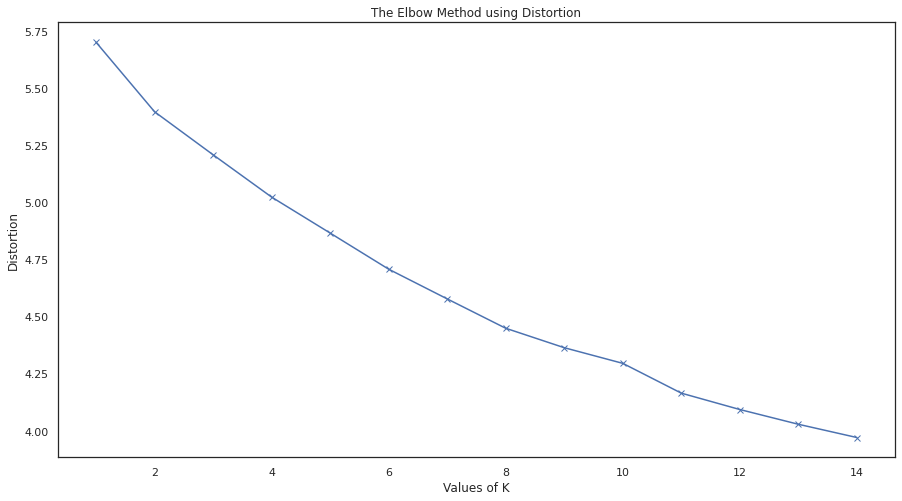

1 : 31239.000000000036
2 : 27775.553516090444
3 : 24608.998403928646
4 : 22668.826596544488
5 : 20986.668904660186
6 : 19734.13864770016
7 : 18569.949815512646
8 : 17616.279771825783
9 : 16781.962931280952
10 : 16046.489133198165
11 : 15304.752359577944
12 : 14740.85363736924
13 : 14231.269246647891
14 : 13765.713527823615


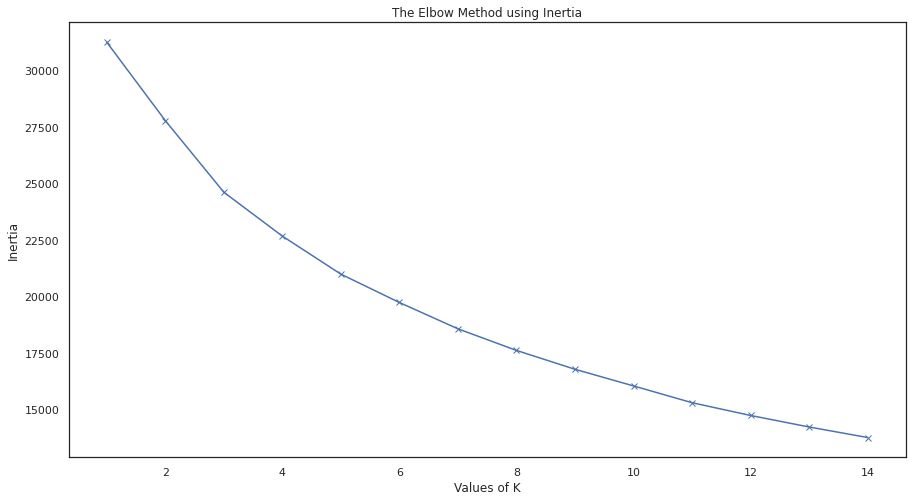

In [55]:
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(init="k-means++", n_clusters=k, n_init=50)
    kmeanModel.fit(cluster_dataset)     
      
    distortions.append(sum(np.min(cdist(cluster_dataset, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster_dataset.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cluster_dataset, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster_dataset.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
test['city_merge_name'] = test['city_merge_name'].apply(numeric_to_name)   
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
        
# Make Plot 1

plt.figure(figsize=(15,8))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 
    
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
# Make Plot 2

plt.figure(figsize=(15,8))
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [56]:
test['city_merge_name'] = test['city_merge_name'].apply(numeric_to_name)   
num_clusters = 6
test['city_merge_name'] = test['city_merge_name'].apply(convert_name_to_numeric)

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=50,algorithm = "elkan")
k_means.fit(cluster_dataset)
labels = k_means.labels_

test['city_merge_name'] = test['city_merge_name'].apply(numeric_to_name)
test["Labels"] = labels
test['Year'] = years

KeyError: 'Anchorage, AK'

In [46]:
modes = test.groupby(['city_merge_name','Labels']).count().reset_index().sort_values(by='violent_crime')
top_labels = modes[['city_merge_name','Labels','violent_crime']].groupby('city_merge_name').head(1)[['city_merge_name','Labels']]
labels = top_labels.sort_values('Labels')
summary = labels.groupby('Labels').head(10).rename(columns={"city_merge_name":"City","Labels":"Group"}).reset_index().drop(columns="index")
summary

KeyError: 'Labels'

In [57]:
test[['city_merge_name','Labels']].groupby('city_merge_name').mean().head(15)

KeyError: "['Labels'] not in index"

In [ ]:
modes['city_merge_name'].unique().shape

In [ ]:
test[test.Year==2017]

In [ ]:
first = test
first[first.Group==5]['city_merge_name'].unique()

In [ ]:
def apply_labels(row):
    item = labels['Labels'][labels.city_merge_name==row].values[0]
    return item

In [ ]:
test['Group']=test['city_merge_name'].apply(apply_labels)

In [ ]:
res= test.groupby('Group').median().reset_index()
res.sort_values(by='violent_crime',ascending=False)

In [ ]:
crime = res.copy()
crime[["violent_crime","property_crime"]] = crime[["violent_crime","property_crime"]]*(10**5)
plt.figure(figsize=(15,8))
ax = sns.barplot(data=crime,x='Group',y='violent_crime',palette="crest")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Rates of Violent Crime', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Rate of Violent Crime (per 100,000)',color='#5B5B5B')

In [ ]:
crime = res.copy()
crime[["violent_crime","property_crime"]] = crime[["violent_crime","property_crime"]]*(10**5)
plt.figure(figsize=(15,8))
ax = sns.barplot(data=crime,x='Group',y='property_crime',palette="crest")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Rates of Violent Crime', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Rate of Violent Crime (per 100,000)',color='#5B5B5B')

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=res,x='Group',y='police',palette="crest")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Police Spending per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Police Spending (per capita $)',color='#5B5B5B')

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=res,x='Group',y='education_services',palette="crest")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Education Services Spending per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Education Services Spending (per capita $)',color='#5B5B5B')

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=res,x='Group',y='social_services',palette="crest")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Social Services Spending per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Social Services Spending (per capita $)',color='#5B5B5B')

### Let's Look at Trends

In [ ]:
res= test.groupby(['Year','Group']).median().reset_index().sort_values(by=['Year','violent_crime'],ascending=[True,False])
res['Year'] = pd.to_datetime(res['Year'],format="%Y")

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=res[res.Group==3],x='Year',y='police',palette="Spectral",hue="Group")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Police Spending per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Police Spending (per capita $)',color='#5B5B5B')

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.lineplot(data=res[res.Group.isin([1,2,4,5])],x='Year',y='police',palette="deep",hue="Group")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Police Spending per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Police Spending (per capita $)',color='#5B5B5B')
_= plt.legend(loc = 'upper left',frameon=False)

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.lineplot(data=res[res.Group.isin([1,2,4,5])],x='Year',y='education_services',palette="deep",hue="Group")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Education Services per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Education Services (per capita $)',color='#5B5B5B')
_= plt.legend(loc = 'upper left',frameon=False)

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.lineplot(data=res[res.Group.isin([1,2,3,5])],x='Year',y='social_services',palette="deep",hue="Group")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Social Services per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Social Services (per capita $)',color='#5B5B5B')
_= plt.legend(loc = 'upper left',frameon=False)

In [ ]:
pct_changes = res[res.Group==2].copy()
pct_changes['police'] = pct_changes['police'].pct_change().fillna(0.0)
pct_changes['social_services'] = pct_changes['social_services'].pct_change().fillna(0.0)
pct_changes['education_services'] = pct_changes['education_services'].pct_change().fillna(0.0)
pct_changes['violent_crime'] = pct_changes['violent_crime'].pct_change().fillna(0.0)
pct_changes

plt.figure(figsize=(15,10))
ax = sns.lineplot(data=pct_changes,x='Year',y='social_services',palette="deep")
sns.lineplot(data=pct_changes,ax=ax,x='Year',y='police',color='r',palette="deep")
sns.lineplot(data=pct_changes,ax=ax,x='Year',y='education_services',color='g',palette="deep")
sns.lineplot(data=pct_changes,ax=ax,x='Year',y='violent_crime',color='orange',palette="deep")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B",
               grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Social Services per Capita', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
_ = ax.set_ylabel('Social Services (per capita $)',color='#5B5B5B')
_= plt.legend(labels = ['social services','police','education_services','violent_crime'],loc = 'upper left',frameon=False)

### Highest Crime Cities

In [ ]:
bygroup = res.sort_values(by='violent_crime',ascending=False)
highest_crime = int(bygroup.reset_index().loc[0]['Group'])
print("Highest Crime Group:",highest_crime)
corrs = test[test.Labels==highest_crime].corr()
sns.heatmap(corrs[abs(corrs)>0.2])

In [ ]:
ProfileReport(test[test.Group==highest_crime][list(test.columns[:5])+list(test.columns[17:18])+list(test.columns[23:34])])

### Lowest Crime Cities

In [ ]:
lowest_crime = int(bygroup.reset_index().loc[bygroup.shape[0]-2]['Group'])
lowest_crime

In [ ]:
test[test.Group==lowest_crime][list(test.columns[:5])+list(test.columns[17:18])+list(test.columns[23:34])+['total_estimate_mean_income_deficit_for_unrelated_individuals_(dollars)']].corr()

### Strongest Positive Correlations

In [ ]:
violent_crime = test.groupby('Labels').median().corr()['violent_crime']
strongest_positive = list(violent_crime[violent_crime>0.50].index)
strongest_positive

### Strongest Negative Correlations

In [ ]:
violent_crime = test.groupby('Labels').median().corr()['violent_crime']
strongest_negative = list(violent_crime[violent_crime<-0.50].index)
strongest_negative

In [ ]:
test.corr()

In [ ]:
property_crime = test.groupby('Labels').mean().corr()['property_crime']
property_crime.sort_values()[abs(property_crime.sort_values())>0.75]

In [ ]:
property_crime = test.groupby('Labels').median().corr()['property_crime']
property_crime.sort_values()[abs(property_crime.sort_values())>0.75]

In [ ]:
violent_crime = test.groupby('Labels').median().corr()['violent_crime']
violent_crime.sort_values()[abs(violent_crime.sort_values())>0.75]

In [ ]:
violent_crime = test.groupby('Labels').mean().corr()['violent_crime']
violent_crime.sort_values()[abs(violent_crime.sort_values())>0.70]

In [ ]:
plt.figure(figsize=(15,10))
var = 'percent_below_poverty_level_estimate_age_under_18_years'
var = 'police'
vcrime = test[[var,'violent_crime','Labels']]
ax =sns.scatterplot(data= vcrime,x=var,y='violent_crime',hue='Labels',palette="Paired")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
sns.despine(left=False, bottom=False, right=True)

In [ ]:
g = sns.FacetGrid(test,row="Labels",aspect=2.5, margin_titles=True)
g.map_dataframe(sns.scatterplot, x=var, y="violent_crime")
#g.set_axis_labels("hour", "Number of Accidents"

In [ ]:
violent_crime = test.groupby('Labels').median().corr()['violent_crime']
strongest_negative = list(violent_crime[violent_crime<-0.50].index)
strongest_negative

In [ ]:
test.groupby('Labels').median().corr()['Group'].sort_values()

In [ ]:
test

In [ ]:
test[test.Group==2][test.columns[:-1]].drop(columns='Labels').corr()['violent_crime'].sort_values()

In [ ]:
group2 = test[test.Group==2]
group2[group2.Year==2017]

In [ ]:
sns.scatterplot(data=test[test.Group==2],x='city_merge_name',y='per_capita_personal_income_dollars')

In [ ]:
relevant_columns = test[['city_merge_name','Year']+strongest_positive+strongest_negative+['Labels']]

In [ ]:
ProfileReport(relevant_columns)

In [ ]:
ProfileReport(test[test.Group==lowest_crime][list(test.columns[:5])+list(test.columns[17:18])+list(test.columns[23:34])])

In [ ]:
res= test.groupby(['Group','Year']).mean().reset_index().sort_values(by=["Year","Group"])
res.head()

In [ ]:
plt.figure(figsize=(15,8))


ax = sns.lineplot(data = res, x='Year',y='violent_crime',hue="Group",palette="deep")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B")
               #grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Violent Crime Over Time', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
ax.set_ylabel('Violent Crime Rate (Per Capita)',color='#5B5B5B')

In [ ]:
test.columns

In [ ]:
plt.figure(figsize=(15,8))


ax = sns.lineplot(data = res, x='Year',y='violent_crime',hue="Group",palette="deep")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
ax.tick_params(direction='out', length=6, width=2, colors="#5B5B5B")
               #grid_color='r', grid_alpha=0.5)
_ = ax.set_title('Violent Crime Over Time', color='#5B5B5B',loc='left',pad=25.0,fontweight="bold")
ax.set_ylabel('Violent Crime Rate (Per Capita)',color='#5B5B5B')

### Save Data

In [ ]:
merged_df3.to_csv('CleanData/CompleteMerged.csv',index=False)

# Lets try a regression

In [19]:
test.head()

,city_merge_name,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,...,total_estimate_mean_income_deficit_for_unrelated_individuals_(dollars),total_estimate_age_under_18_years,total_estimate_sex_male,total_estimate_age_65_years_and_over,percent_below_poverty_level_estimate_age_18_to_64_years,percent_race_one_race_asian,percent_race_one_race_black_or_african_american,percent_race_one_race_native_hawaiian_and_other_pacific_islander,percent_race_one_race_white,percent_hispanic_or_latino
0,"Anchorage, AK",0.008129,0.035063,6036.69,433.95,2880.31,2846.29,0.0,2846.29,103.90,...,6609.0,0.263086,0.492334,1.825603e-07,8.6,6.5,4.9,1.7,71.1,6.7
1,"Anchorage, AK",0.007892,0.033020,5815.54,410.66,2787.14,2755.34,0.0,2755.34,93.42,...,6002.0,0.257335,0.486247,1.999156e-07,7.5,6.5,4.3,1.6,70.8,6.9
2,"Anchorage, AK",0.008111,0.036182,5378.15,446.75,2429.79,2398.01,0.0,2398.01,96.70,...,7493.0,0.254884,0.497295,2.031304e-07,7.9,7.4,5.0,1.6,70.3,7.2
3,"Anchorage, AK",0.007938,0.041478,5694.68,454.03,2471.81,2439.77,0.0,2439.77,128.83,...,6788.0,0.251880,0.495222,2.108275e-07,7.2,6.5,4.8,1.7,69.8,7.6
4,"Anchorage, AK",0.008437,0.039514,5735.87,468.50,2456.47,2430.38,0.0,2430.38,81.63,...,6674.0,0.250585,0.495168,2.261289e-07,8.5,7.4,4.5,1.7,69.3,7.9


In [26]:
test['city_merge_name'].unique()

array(['Anchorage, AK', 'Fairbanks, AK', 'Birmingham, AL', 'Mobile, AL',
       'Montgomery, AL', 'Ft. Smith, AR', 'Little Rock, AR',
       'Phoenix, AZ', 'Tucson, AZ', 'Bakersfield, CA', 'Fresno, CA',
       'Los Angeles, CA', 'Modesto, CA', 'Riverside, CA',
       'Sacramento, CA', 'San Diego, CA', 'San Francisco, CA',
       'San Jose, CA', 'Stockton, CA', 'Colorado Springs, CO',
       'Denver, CO', 'Bridgeport, CT', 'Hartford, CT', 'New Haven, CT',
       'Washington, DC', 'Dover, DE', 'Jacksonville, FL', 'Miami, FL',
       'Orlando, FL', 'Tallahassee, FL', 'Tampa, FL', 'Atlanta, GA',
       'Columbus, GA', 'Cedar Rapids, IA', 'Des Moines, IA',
       'Chicago, IL', 'Indianapolis, IN', 'Topeka, KS', 'Wichita, KS',
       'Lexington, KY', 'Louisville, KY', 'Baton Rouge, LA',
       'New Orleans, LA', 'Shreveport, LA', 'Boston, MA',
       'Springfield, MA', 'Worcester, MA', 'Baltimore, MD',
       'Lewiston, ME', 'Portland, ME', 'Detroit, MI', 'Flint, MI',
       'Grand Rapids, M

In [28]:
regtestdf = test[test["city_merge_name"]!='Washington, DC']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
test.columns

Index(['city_merge_name', 'violent_crime', 'property_crime', 'rev_total',
       'police', 'education_services', 'education', 'educ_higher',
       'educ_elem_sec', 'social_services', 'public_welfare', 'welfare_cash',
       'welfare_vendors', 'welfare_other', 'correction', 'parks_recreation',
       'housing_commdevt', 'per_capita_personal_income_dollars',
       'personal_income_thousands_of_dollars',
       'total_estimate_educational_attainment_population_25_years_and_over',
       'percent_below_poverty_level_estimate_age_65_years_and_over',
       'percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months',
       'total_estimate_age_18_to_64_years',
       'total_estimate_employment_status_civilian_labor_force_16_years_and_over',
       'total_estimate_population_for_whom_poverty_status_is_determined',
       'percent_below_poverty_level_estimate_age_under_18_years',
       'percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_

In [37]:
feat=['city_merge_name','violent_crime','rev_total', 'police','percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined','education_services','percent_race_one_race_asian',
       'percent_race_one_race_black_or_african_american',
       'percent_race_one_race_native_hawaiian_and_other_pacific_islander',
       'percent_race_one_race_white', 'percent_hispanic_or_latino','per_capita_personal_income_dollars']



In [38]:
regdf = regtestdf.loc[:, test.columns.isin(feat)]
#df.loc[:, df.columns.isin(list('BCD'))]

In [39]:
regdf= regdf.rename(columns= {'percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined':
                              'Pcnt below poverty','percent_race_one_race_native_hawaiian_and_other_pacific_islander':'percent_hawaiian'})


In [40]:
traindf, testdf = train_test_split(regdf, test_size = 0.2, random_state = 4)

In [19]:
traindf.head()

,violent_crime,rev_total,police,education_services,per_capita_personal_income_dollars,Pcnt below poverty,percent_race_one_race_asian,percent_race_one_race_black_or_african_american,percent_race_one_race_native_hawaiian_and_other_pacific_islander,percent_race_one_race_white,percent_hispanic_or_latino
295,0.005290,4330.28,261.64,1860.64,45727.0,15.1,3.4,7.8,0.0,82.8,12.0
515,0.002658,4609.58,219.37,1566.72,58566.0,8.2,4.0,3.0,0.1,89.6,6.7
649,0.002241,4156.31,277.14,1851.76,32425.0,19.5,2.0,0.8,0.5,79.1,22.4
431,0.002219,11141.86,508.12,1554.24,34045.0,18.7,2.5,19.5,0.0,74.0,5.1
480,0.003976,4336.27,270.34,1319.14,52366.0,8.3,0.6,0.6,0.0,88.8,1.5


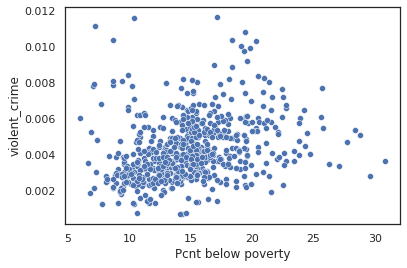

In [42]:
ax = sns.scatterplot(x="Pcnt below poverty", y="violent_crime", data=traindf)


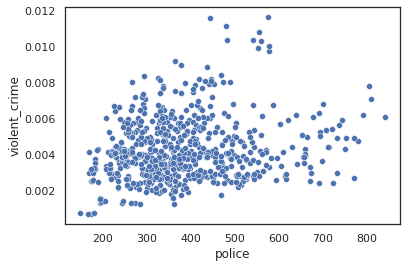

In [36]:
ax = sns.scatterplot(x="police", y = 'violent_crime', data = traindf)

In [20]:
testdf.shape

(161, 11)

In [21]:
traindf.shape

(640, 11)

In [36]:
Xfeats = ['rev_total', 'police', 'education_services',
       'per_capita_personal_income_dollars', 'Pcnt below poverty',
       'percent_race_one_race_asian',
       'percent_race_one_race_black_or_african_american',
       'percent_hawaiian',
       'percent_race_one_race_white', 'percent_hispanic_or_latino']

In [18]:
Xtrain = traindf.loc[:, traindf.columns.isin(Xfeats)]

NameError: name 'Xfeats' is not defined

In [38]:
#Xtrain= traindf[['police','educ_elem_sec','Pcnt below poverty']]
Ytrain = traindf['violent_crime']

In [61]:
Xtest= testdf.loc[:, testdf.columns.isin(Xfeats)]
Ytest = testdf['violent_crime']

In [46]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Xtrain, Ytrain)

LinearRegression()

In [54]:
# Make predictions using the testing set
crime_pred = regr.predict(Xtest)

In [56]:
crime_pred.shape

(161,)

Coefficients: 
 [ 2.30514711e-06 -1.43648870e-07  1.32315716e-04]
Mean squared error: 0.00
Coefficient of determination: 0.21


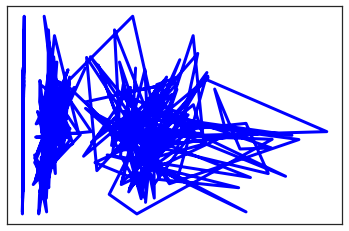

In [59]:
# Make predictions using the testing set
crime_pred = regr.predict(Xtest)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Ytest, crime_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Ytest, crime_pred))

# Plot outputs
#plt.scatter(Xtest, Ytest,  color='black')
plt.plot(Xtest, crime_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [64]:
Xtrain.shape

(640, 3)

In [65]:
Ytrain.shape

(640,)

In [27]:
Xtrain.head(3)

,police,educ_elem_sec,Pcnt below poverty
295,261.64,1840.00,15.1
515,219.37,1548.78,8.2
649,277.14,1820.46,19.5


In [28]:
Ytrain.head(3)

295    0.005290
515    0.002658
649    0.002241
Name: violent_crime, dtype: float64

In [ ]:
import statsmodels.formula.api as sm

from statsmodels.api import add_constant

X_train = add_constant(X_train)

X_test = add_constant(X_test)

In [63]:
import statsmodels.api as sm
from statsmodels.api import add_constant
Xtrain = add_constant(Xtrain)
mod = sm.OLS(Ytrain, Xtrain)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          violent_crime   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     26.81
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.10e-42
Time:                        20:48:50   Log-Likelihood:                 3268.8
No. Observations:                 640   AIC:                            -6516.
Df Residuals:                     629   BIC:                            -6466.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [41]:
res.params

rev_total                                         -2.741129e-08
police                                             1.279470e-06
education_services                                -1.359054e-08
per_capita_personal_income_dollars                 2.063790e-08
Pcnt below poverty                                 1.333404e-04
percent_race_one_race_asian                       -2.986335e-05
percent_race_one_race_black_or_african_american    5.576979e-05
percent_hawaiian                                   2.152324e-03
percent_race_one_race_white                       -5.843597e-07
percent_hispanic_or_latino                         1.297506e-05
dtype: float64

In [23]:
testdf['fits']=testdf['police']*3.146531e-06 + testdf['educ_elem_sec']*9.261511e-08 + testdf['Pcnt below poverty']*.0002

In [24]:
testdf.head()

,violent_crime,police,educ_elem_sec,Pcnt below poverty,fits
289,0.003684,362.04,1397.17,13.4,0.003949
637,0.002366,384.84,1013.07,22.5,0.005805
511,0.002814,305.73,1577.79,9.6,0.003028
795,0.000702,169.97,970.79,13.7,0.003365
752,0.006593,294.71,1598.34,15.0,0.004075


<AxesSubplot:xlabel='violent_crime', ylabel='fits'>

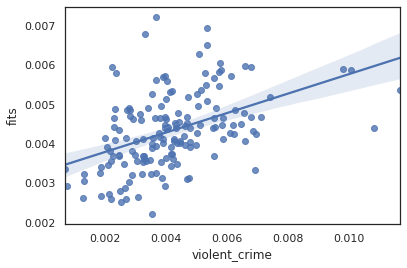

In [30]:
sns.regplot(data = testdf, x='violent_crime', y= 'fits', fit_reg = "True")

In [31]:
Ytrain =Ytrain*100000

In [32]:
import statsmodels.api as sm
mod = sm.OLS(Ytrain, Xtrain)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          violent_crime   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1421.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):                   1.22e-281
Time:                        15:07:02   Log-Likelihood:                         -4183.9
No. Observations:                 640   AIC:                                      8374.
Df Residuals:                     637   BIC:                                      8387.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Lets Isolate Only features that are significant

In [67]:
betterXfeat = ["police",       
"Pcnt below poverty",                          
]

In [68]:
Xtrain= traindf.loc[:, traindf.columns.isin(betterXfeat)]
Ytrain = traindf['violent_crime']
Xtest= testdf.loc[:, testdf.columns.isin(betterXfeat)]
Ytest = testdf['violent_crime']

In [69]:
import statsmodels.api as sm
from statsmodels.api import add_constant
Xtrain = add_constant(Xtrain)
mod = sm.OLS(Ytrain, Xtrain)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          violent_crime   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     39.99
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           4.35e-17
Time:                        21:07:19   Log-Likelihood:                 3193.0
No. Observations:                 640   AIC:                            -6380.
Df Residuals:                     637   BIC:                            -6367.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0014      0